In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sys
!{sys.executable} -m pip install pandas-profiling
!{sys.executable} -m pip install pandasql 
!{sys.executable} -m pip install impyute 

import impyute
from pandasql import sqldf
import pandas_profiling

patient = pd.read_csv('patient_data.csv')


In [72]:
patient

,track_name,track_type,CG-A3-3387,CG-A3-3374,CG-A3-3363,CG-CZ-5460,CG-BP-4176,CG-CJ-6032,CG-BP-5192,CG-CW-5585,...,CG-CJ-4902,CG-CJ-4905,CG-CJ-4908,CG-CJ-5686,CG-CW-5589,CG-CZ-4863,CG-CZ-5459,CG-DV-5565,CG-DV-5574,CG-MM-A563
0,# Samples per Patient,CLINICAL,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,Profiled in Mutations,CLINICAL,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,NaN
2,Profiled in Putative copy-number alterations f...,CLINICAL,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
3,American Joint Committee on Cancer Tumor Stage...,CLINICAL,T1a,T1b,T2,T3b,T1b,T2,T1a,T3b,...,T3a,T1a,T1a,T1b,T1a,T3b,T3b,T1a,T1a,T3
4,Cancer Type,CLINICAL,Renal Cell Carcinoma,Renal Cell Carcinoma,Renal Cell Carcinoma,Renal Cell Carcinoma,Renal Cell Carcinoma,Renal Cell Carcinoma,Renal Cell Carcinoma,Renal Cell Carcinoma,...,Renal Cell Carcinoma,Renal Cell Carcinoma,Renal Cell Carcinoma,Renal Cell Carcinoma,Renal Cell Carcinoma,Renal Cell Carcinoma,Renal Cell Carcinoma,Renal Cell Carcinoma,Renal Cell Carcinoma,Renal Cell Carcinoma
5,Diagnosis Age,CLINICAL,49,51,50,55,64,63,59,51,...,61,62,38,59,52,51,63,59,37,41
6,Informed consent verified,CLINICAL,YES,YES,NO,YES,YES,NO,YES,YES,...,YES,YES,YES,YES,YES,YES,YES,YES,YES,YES
7,Neoplasm Histologic Type Name,CLINICAL,Kidney Clear Cell Renal Carcinoma,Kidney Clear Cell Renal Carcinoma,Kidney Clear Cell Renal Carcinoma,Kidney Clear Cell Renal Carcinoma,Kidney Clear Cell Renal Carcinoma,Kidney Clear Cell Renal Carcinoma,Kidney Clear Cell Renal Carcinoma,Kidney Clear Cell Renal Carcinoma,...,Kidney Clear Cell Renal Carcinoma,Kidney Clear Cell Renal Carcinoma,Kidney Clear Cell Renal Carcinoma,Kidney Clear Cell Renal Carcinoma,Kidney Clear Cell Renal Carcinoma,Kidney Clear Cell Renal Carcinoma,Kidney Clear Cell Renal Carcinoma,Kidney Clear Cell Renal Carcinoma,Kidney Clear Cell Renal Carcinoma,Kidney Clear Cell Renal Carcinoma
8,Overall Survival (Months),CLINICAL,20.27,43.17,10.48,94.38,64.22,119.55,23.46,85.71,...,49.93,49.15,50.3,66.95,78.12,63.34,55.29,43.66,66.23,19.42
9,Neoplasm Histologic Grade,CLINICAL,G2,G2,G2,G2,G2,G3,G2,G2,...,G3,G2,G2,G3,G2,G3,G3,G2,G2,G2


In [73]:
patient = patient.set_index('track_name').T
patient = patient[1:]
patient = patient.reset_index()
patient = patient.rename(columns = {'index':'ID'})
patient['ID'] = patient['ID'].str.upper()

In [74]:
patient

track_name,ID,# Samples per Patient,Profiled in Mutations,Profiled in Putative copy-number alterations from GISTIC,American Joint Committee on Cancer Tumor Stage Code,Cancer Type,Diagnosis Age,Informed consent verified,Neoplasm Histologic Type Name,Overall Survival (Months),Neoplasm Histologic Grade,Race Category,Overall Survival Status,Sex,Patient's Vital Status,Mutation Count
0,CG-A3-3387,1,Yes,Yes,T1a,Renal Cell Carcinoma,49,YES,Kidney Clear Cell Renal Carcinoma,20.27,G2,WHITE,LIVING,Male,Alive,70
1,CG-A3-3374,1,Yes,Yes,T1b,Renal Cell Carcinoma,51,YES,Kidney Clear Cell Renal Carcinoma,43.17,G2,BLACK OR AFRICAN AMERICAN,LIVING,Female,Alive,934
2,CG-A3-3363,1,Yes,Yes,T2,Renal Cell Carcinoma,50,NO,Kidney Clear Cell Renal Carcinoma,10.48,G2,ASIAN,LIVING,Male,Alive,1392
3,CG-CZ-5460,1,Yes,Yes,T3b,Renal Cell Carcinoma,55,YES,Kidney Clear Cell Renal Carcinoma,94.38,G2,WHITE,LIVING,Male,Alive,52
4,CG-BP-4176,1,Yes,Yes,T1b,Renal Cell Carcinoma,64,YES,Kidney Clear Cell Renal Carcinoma,64.22,G2,WHITE,LIVING,Male,Alive,85
5,CG-CJ-6032,1,Yes,Yes,T2,Renal Cell Carcinoma,63,NO,Kidney Clear Cell Renal Carcinoma,119.55,G3,WHITE,LIVING,Female,Alive,42
6,CG-BP-5192,1,Yes,Yes,T1a,Renal Cell Carcinoma,59,YES,Kidney Clear Cell Renal Carcinoma,23.46,G2,WHITE,LIVING,Male,Alive,46
7,CG-CW-5585,1,Yes,Yes,T3b,Renal Cell Carcinoma,51,YES,Kidney Clear Cell Renal Carcinoma,85.71,G2,WHITE,LIVING,Male,Alive,41
8,CG-B0-5691,1,Yes,Yes,T1a,Renal Cell Carcinoma,66,YES,Kidney Clear Cell Renal Carcinoma,112.71,G3,WHITE,LIVING,Female,Alive,55
9,CG-AK-3453,1,Yes,Yes,T2,Renal Cell Carcinoma,58,YES,Kidney Clear Cell Renal Carcinoma,83.15,G2,WHITE,LIVING,Female,Alive,350


In [75]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 16 columns):
ID                                                          533 non-null object
# Samples per Patient                                       533 non-null object
Profiled in Mutations                                       449 non-null object
Profiled in Putative copy-number alterations from GISTIC    525 non-null object
American Joint Committee on Cancer Tumor Stage Code         533 non-null object
Cancer Type                                                 533 non-null object
Diagnosis Age                                               533 non-null object
Informed consent verified                                   533 non-null object
Neoplasm Histologic Type Name                               533 non-null object
Overall Survival (Months)                                   533 non-null object
Neoplasm Histologic Grade                                   530 non-null object
Race Category  

In [76]:
patient['Diagnosis Age'] = pd.to_numeric(patient['Diagnosis Age'])
patient['Overall Survival (Months)'] = pd.to_numeric(patient['Overall Survival (Months)'])
patient['Mutation Count'] = pd.to_numeric(patient['Mutation Count'])

In [77]:
patient.nunique()

track_name
ID                                                          533
# Samples per Patient                                         2
Profiled in Mutations                                         1
Profiled in Putative copy-number alterations from GISTIC      1
American Joint Committee on Cancer Tumor Stage Code          11
Cancer Type                                                   1
Diagnosis Age                                                59
Informed consent verified                                     2
Neoplasm Histologic Type Name                                 1
Overall Survival (Months)                                   480
Neoplasm Histologic Grade                                     5
Race Category                                                 3
Overall Survival Status                                       2
Sex                                                           3
Patient's Vital Status                                        2
Mutation Count               

In [78]:
patient.isnull().sum()

track_name
ID                                                           0
# Samples per Patient                                        0
Profiled in Mutations                                       84
Profiled in Putative copy-number alterations from GISTIC     8
American Joint Committee on Cancer Tumor Stage Code          0
Cancer Type                                                  0
Diagnosis Age                                                0
Informed consent verified                                    0
Neoplasm Histologic Type Name                                0
Overall Survival (Months)                                    0
Neoplasm Histologic Grade                                    3
Race Category                                                7
Overall Survival Status                                      0
Sex                                                          0
Patient's Vital Status                                       3
Mutation Count                              

In [79]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 16 columns):
ID                                                          533 non-null object
# Samples per Patient                                       533 non-null object
Profiled in Mutations                                       449 non-null object
Profiled in Putative copy-number alterations from GISTIC    525 non-null object
American Joint Committee on Cancer Tumor Stage Code         533 non-null object
Cancer Type                                                 533 non-null object
Diagnosis Age                                               533 non-null int64
Informed consent verified                                   533 non-null object
Neoplasm Histologic Type Name                               533 non-null object
Overall Survival (Months)                                   533 non-null float64
Neoplasm Histologic Grade                                   530 non-null object
Race Category  

In [80]:
patient.groupby(['# Samples per Patient']).size()

# Samples per Patient
1    532
2      1
dtype: int64

In [81]:
patient = patient[patient['# Samples per Patient']!='2'].reset_index(drop=True)

In [82]:
patient['Sex'] = patient['Sex'].str.lower()

In [83]:
patient = patient.drop(['Profiled in Mutations','Profiled in Putative copy-number alterations from GISTIC'],axis=1)

In [84]:
patient.groupby(['American Joint Committee on Cancer Tumor Stage Code']).size()

American Joint Committee on Cancer Tumor Stage Code
T1      21
T1a    141
T1b    110
T2      55
T2a     10
T2b      4
T3       5
T3a    121
T3b     52
T3c      2
T4      11
dtype: int64

In [85]:
def label(x):
    if 'T1' in x:
        return 'T1'
    if 'T2' in x:
        return 'T2'
    if 'T3' in x:
        return 'T3'
    return 'T4'
    
patient['Stage'] = patient['American Joint Committee on Cancer Tumor Stage Code'].apply(lambda x: label(x))

In [86]:
patient.groupby(['Stage']).size()

Stage
T1    272
T2     69
T3    180
T4     11
dtype: int64

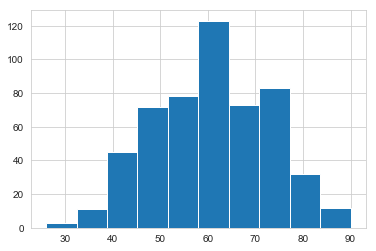

In [87]:
patient['Diagnosis Age'].hist()

In [88]:


patient.groupby(['Informed consent verified']).size()

Informed consent verified
NO       3
YES    529
dtype: int64

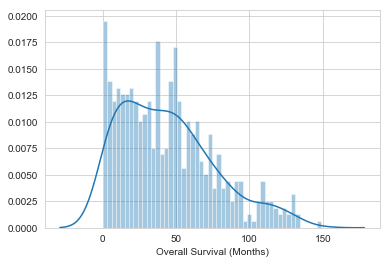

In [89]:
sns.distplot(patient['Overall Survival (Months)'],bins=50)

Neoplasm Histologic Grade
G1     14
G2    229
G3    205
G4     76
GX      5
dtype: int64


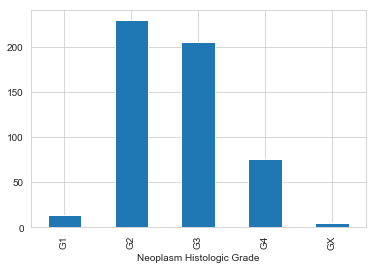

In [90]:
print(patient.groupby(['Neoplasm Histologic Grade']).size())
patient.groupby(['Neoplasm Histologic Grade']).size().plot(kind='bar')

Race Category
ASIAN                          8
BLACK OR AFRICAN AMERICAN     55
WHITE                        462
dtype: int64


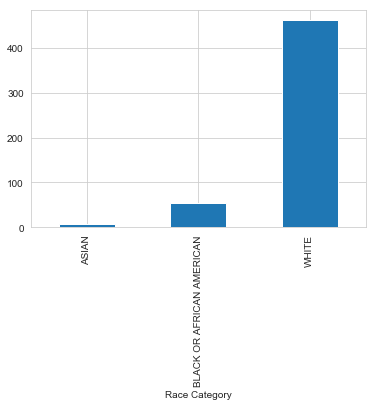

In [91]:
print(patient.groupby(['Race Category']).size())
patient.groupby(['Race Category']).size().plot(kind='bar')

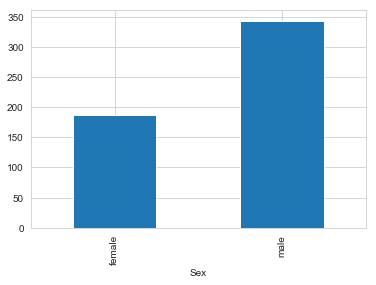

In [92]:

patient.groupby(['Sex']).size().plot(kind='bar')

In [93]:
pd.crosstab(patient['Overall Survival Status'],patient['Patient\'s Vital Status'])

Patient's Vital Status,Alive,Dead
Overall Survival Status,,
DECEASED,0,172
LIVING,357,0


In [94]:
patient[['Overall Survival Status','Patient\'s Vital Status']].isnull().sum()

track_name
Overall Survival Status    0
Patient's Vital Status     3
dtype: int64

In [95]:
patient = patient.drop(['Patient\'s Vital Status'],axis=1)

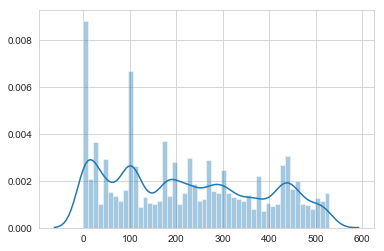

In [96]:
count = patient['Mutation Count']
mutation = []
for i in range(len(count)):
    mutation = mutation + [i] * count[i]
mutation = pd.Series(mutation)

sns.set_style('whitegrid')
sns.distplot(mutation,bins=50)

In [97]:
patient_data = patient
patient_data = patient_data.drop(['# Samples per Patient','Cancer Type','Informed consent verified','Neoplasm Histologic Type Name'],axis=1)

In [98]:
patient_data = patient_data.drop(['American Joint Committee on Cancer Tumor Stage Code'],axis=1)

In [99]:
patient_data

track_name,ID,Diagnosis Age,Overall Survival (Months),Neoplasm Histologic Grade,Race Category,Overall Survival Status,Sex,Mutation Count,Stage
0,CG-A3-3387,49,20.27,G2,WHITE,LIVING,male,70,T1
1,CG-A3-3374,51,43.17,G2,BLACK OR AFRICAN AMERICAN,LIVING,female,934,T1
2,CG-A3-3363,50,10.48,G2,ASIAN,LIVING,male,1392,T2
3,CG-CZ-5460,55,94.38,G2,WHITE,LIVING,male,52,T3
4,CG-BP-4176,64,64.22,G2,WHITE,LIVING,male,85,T1
5,CG-CJ-6032,63,119.55,G3,WHITE,LIVING,female,42,T2
6,CG-BP-5192,59,23.46,G2,WHITE,LIVING,male,46,T1
7,CG-CW-5585,51,85.71,G2,WHITE,LIVING,male,41,T3
8,CG-B0-5691,66,112.71,G3,WHITE,LIVING,female,55,T1
9,CG-AK-3453,58,83.15,G2,WHITE,LIVING,female,350,T2


In [100]:
patient_data.nunique()

track_name
ID                           532
Diagnosis Age                 59
Overall Survival (Months)    479
Neoplasm Histologic Grade      5
Race Category                  3
Overall Survival Status        2
Sex                            2
Mutation Count               116
Stage                          4
dtype: int64

In [101]:
patient_data.isnull().sum()

track_name
ID                           0
Diagnosis Age                0
Overall Survival (Months)    0
Neoplasm Histologic Grade    3
Race Category                7
Overall Survival Status      0
Sex                          0
Mutation Count               0
Stage                        0
dtype: int64

In [102]:
patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 9 columns):
ID                           532 non-null object
Diagnosis Age                532 non-null int64
Overall Survival (Months)    532 non-null float64
Neoplasm Histologic Grade    529 non-null object
Race Category                525 non-null object
Overall Survival Status      532 non-null object
Sex                          532 non-null object
Mutation Count               532 non-null int64
Stage                        532 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 37.5+ KB


In [103]:
pandas_profiling.ProfileReport(patient_data)

Number of variables,9
Number of observations,532
Total Missing (%),0.2%
Total size in memory,37.5 KiB
Average record size in memory,72.2 B
Numeric,3
Categorical,5
Boolean,0
Date,0
Text (Unique),1
Rejected,0


In [274]:
patient

track_name,ID,# Samples per Patient,American Joint Committee on Cancer Tumor Stage Code,Cancer Type,Diagnosis Age,Informed consent verified,Neoplasm Histologic Type Name,Overall Survival (Months),Neoplasm Histologic Grade,Race Category,Overall Survival Status,Sex,Mutation Count,Stage
0,CG-A3-3387,1,T1a,Renal Cell Carcinoma,49,YES,Kidney Clear Cell Renal Carcinoma,20.27,G2,WHITE,LIVING,male,70,T1
1,CG-A3-3374,1,T1b,Renal Cell Carcinoma,51,YES,Kidney Clear Cell Renal Carcinoma,43.17,G2,BLACK OR AFRICAN AMERICAN,LIVING,female,934,T1
2,CG-A3-3363,1,T2,Renal Cell Carcinoma,50,NO,Kidney Clear Cell Renal Carcinoma,10.48,G2,ASIAN,LIVING,male,1392,T2
3,CG-CZ-5460,1,T3b,Renal Cell Carcinoma,55,YES,Kidney Clear Cell Renal Carcinoma,94.38,G2,WHITE,LIVING,male,52,T3
4,CG-BP-4176,1,T1b,Renal Cell Carcinoma,64,YES,Kidney Clear Cell Renal Carcinoma,64.22,G2,WHITE,LIVING,male,85,T1
5,CG-CJ-6032,1,T2,Renal Cell Carcinoma,63,NO,Kidney Clear Cell Renal Carcinoma,119.55,G3,WHITE,LIVING,female,42,T2
6,CG-BP-5192,1,T1a,Renal Cell Carcinoma,59,YES,Kidney Clear Cell Renal Carcinoma,23.46,G2,WHITE,LIVING,male,46,T1
7,CG-CW-5585,1,T3b,Renal Cell Carcinoma,51,YES,Kidney Clear Cell Renal Carcinoma,85.71,G2,WHITE,LIVING,male,41,T3
8,CG-B0-5691,1,T1a,Renal Cell Carcinoma,66,YES,Kidney Clear Cell Renal Carcinoma,112.71,G3,WHITE,LIVING,female,55,T1
9,CG-AK-3453,1,T2,Renal Cell Carcinoma,58,YES,Kidney Clear Cell Renal Carcinoma,83.15,G2,WHITE,LIVING,female,350,T2


In [275]:
patient_data

track_name,ID,Diagnosis Age,Overall Survival (Months),Neoplasm Histologic Grade,Race Category,Overall Survival Status,Sex,Mutation Count,Stage
0,CG-A3-3387,49,20.27,G2,WHITE,LIVING,male,70,T1
1,CG-A3-3374,51,43.17,G2,BLACK OR AFRICAN AMERICAN,LIVING,female,934,T1
2,CG-A3-3363,50,10.48,G2,ASIAN,LIVING,male,1392,T2
3,CG-CZ-5460,55,94.38,G2,WHITE,LIVING,male,52,T3
4,CG-BP-4176,64,64.22,G2,WHITE,LIVING,male,85,T1
5,CG-CJ-6032,63,119.55,G3,WHITE,LIVING,female,42,T2
6,CG-BP-5192,59,23.46,G2,WHITE,LIVING,male,46,T1
7,CG-CW-5585,51,85.71,G2,WHITE,LIVING,male,41,T3
8,CG-B0-5691,66,112.71,G3,WHITE,LIVING,female,55,T1
9,CG-AK-3453,58,83.15,G2,WHITE,LIVING,female,350,T2


In [104]:
patient.isnull().sum()

track_name
ID                                                     0
# Samples per Patient                                  0
American Joint Committee on Cancer Tumor Stage Code    0
Cancer Type                                            0
Diagnosis Age                                          0
Informed consent verified                              0
Neoplasm Histologic Type Name                          0
Overall Survival (Months)                              0
Neoplasm Histologic Grade                              3
Race Category                                          7
Overall Survival Status                                0
Sex                                                    0
Mutation Count                                         0
Stage                                                  0
dtype: int64

In [105]:
p1 = patient

In [107]:
impyute.imputation.cs.random(p1)

/Users/yuchen/anaconda3/envs/ds_pack/lib/python3.6/site-packages/impyute/util/preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()


BadInputError: Data is not float.